In [1]:
import pandas as pd
import numpy as np

import os 

import matplotlib.pyplot as plt

from pymatgen.core import Structure

from FeGB_PtableSeg.plotters import plot_minEseg_prop, periodic_table_plot, custom_colors, gb_latex_dict, bulk_df

from utils.periodic_table import get_element_number
%load_ext autoreload
%autoreload 2

In [2]:
class GB_symmetries():
    def __init__(self):
        # S3 S111
        studied_list = [20, 22, 24, 26, 28, 30, 32, 34, 36]
        # 0.5-1ML available
        symmetry = [[21, 52, 53],\
                    [23, 50, 51],\
                    [25, 48, 49],\
                    [27, 46, 47],\
                    [29, 44, 45],\
                    [31, 42, 43],\
                    [33, 40, 41],\
                    [35, 38, 39],\
                    [37]]
        # When the site is on the GB plane, we don't need to calculate values on both sides
        self.S3_1_symmetrydict = dict(zip(studied_list,symmetry))
        
        # S3 S112
        studied_list = [12, 14, 16, 18, 20, 22, 24]
        # 0.5-1ML available
        symmetry = [[13, 36, 37],\
                    [15, 34, 35],\
                    [17, 32, 33],\
                    [19, 30, 31],\
                    [21, 28, 29],\
                    [23, 26, 27],\
                    [25]]
        # When the site is on the GB plane, we don't need to calculate values on both sides
        self.S3_2_symmetrydict = dict(zip(studied_list,symmetry))
        
        # S9
        studied_list = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
        # only 0-1 ML available
        symmetry = [[47],\
                [46],\
                [45],\
                [44],\
                [43],\
                [42],\
                [41],\
                [40],\
                [39],\
                [38],\
                [37],\
                [],\
                [],\
                []]
        # When the site is on the GB plane, we don't need to calculate values on both sides
        self.S9_symmetrydict = dict(zip(studied_list,symmetry))
        
        # S11
        studied_list = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
        # only 0-1 ML available
        symmetry = [[32],\
                    [31],\
                    [30],\
                    [29],\
                    [28],\
                    [27],\
                    [26],\
                    [25],\
                    [24],\
                    [23],\
                    [],\
                    []]
        self.S11_symmetrydict = dict(zip(studied_list,symmetry))
        
        #S5 210
        studied_list = [24, 27, 29, 31, 33, 35, 37]
        # ML not well defined, should be 0,0.5,1 ML but middle plane has two inequivalent sites
        symmetry = [[25] + [46, 47],\
                    [26] + [44, 45],\
                    [28] + [42, 43],\
                    [30] + [40, 41],\
                    [32] + [38, 39],\
                    [34],\
                    [36]]
        self.S5_2_symmetrydict = dict(zip(studied_list,symmetry))

        # S5 310
        # 0/0.25/0.5/0.75/1 ML
        studied_list = [23, 27, 33, 37, 40]
        symmetry = [[22, 24, 25] + [54, 55, 56, 57],\
                    [26, 28, 29] + [50, 51 ,52, 53],\
                    [30, 31, 32] + [46, 47, 48, 49],\
                    [34, 35, 36] + [42, 43, 44, 45],\
                    [38, 39, 41]]
        self.S5_3_symmetrydict = dict(zip(studied_list,symmetry))
        
        name_list = ['S9_RA110_S2_21',
        'S11_RA110_S3_32',
        'S3_RA110_S1_12',
        'S3_RA110_S1_11',
        'S5_RA001_S310',
        'S5_RA001_S210']
        
        self.symmetry_dict_all = dict(zip(name_list,
                                          [self.S9_symmetrydict,
                                           self.S11_symmetrydict,
                                           self.S3_2_symmetrydict,
                                           self.S3_1_symmetrydict,
                                           self.S5_3_symmetrydict,
                                           self.S5_2_symmetrydict])
                                     )
GB_sym = GB_symmetries()

In [3]:
df = pd.read_pickle("ptable_Fe_GB_df.pkl.gz", compression="gzip")
df["Z"] = df.element.apply(get_element_number)
df = df.drop(columns=["equivalent_sites"])
df["equivalent_sites"] = [GB_sym.symmetry_dict_all[row.GB][int(row.site)] for _, row in df.iterrows()]
df["site_multiplicity"] = [len(row.equivalent_sites)+1 for _, row in df.iterrows()]

# Manuscript plots

## Figure 2

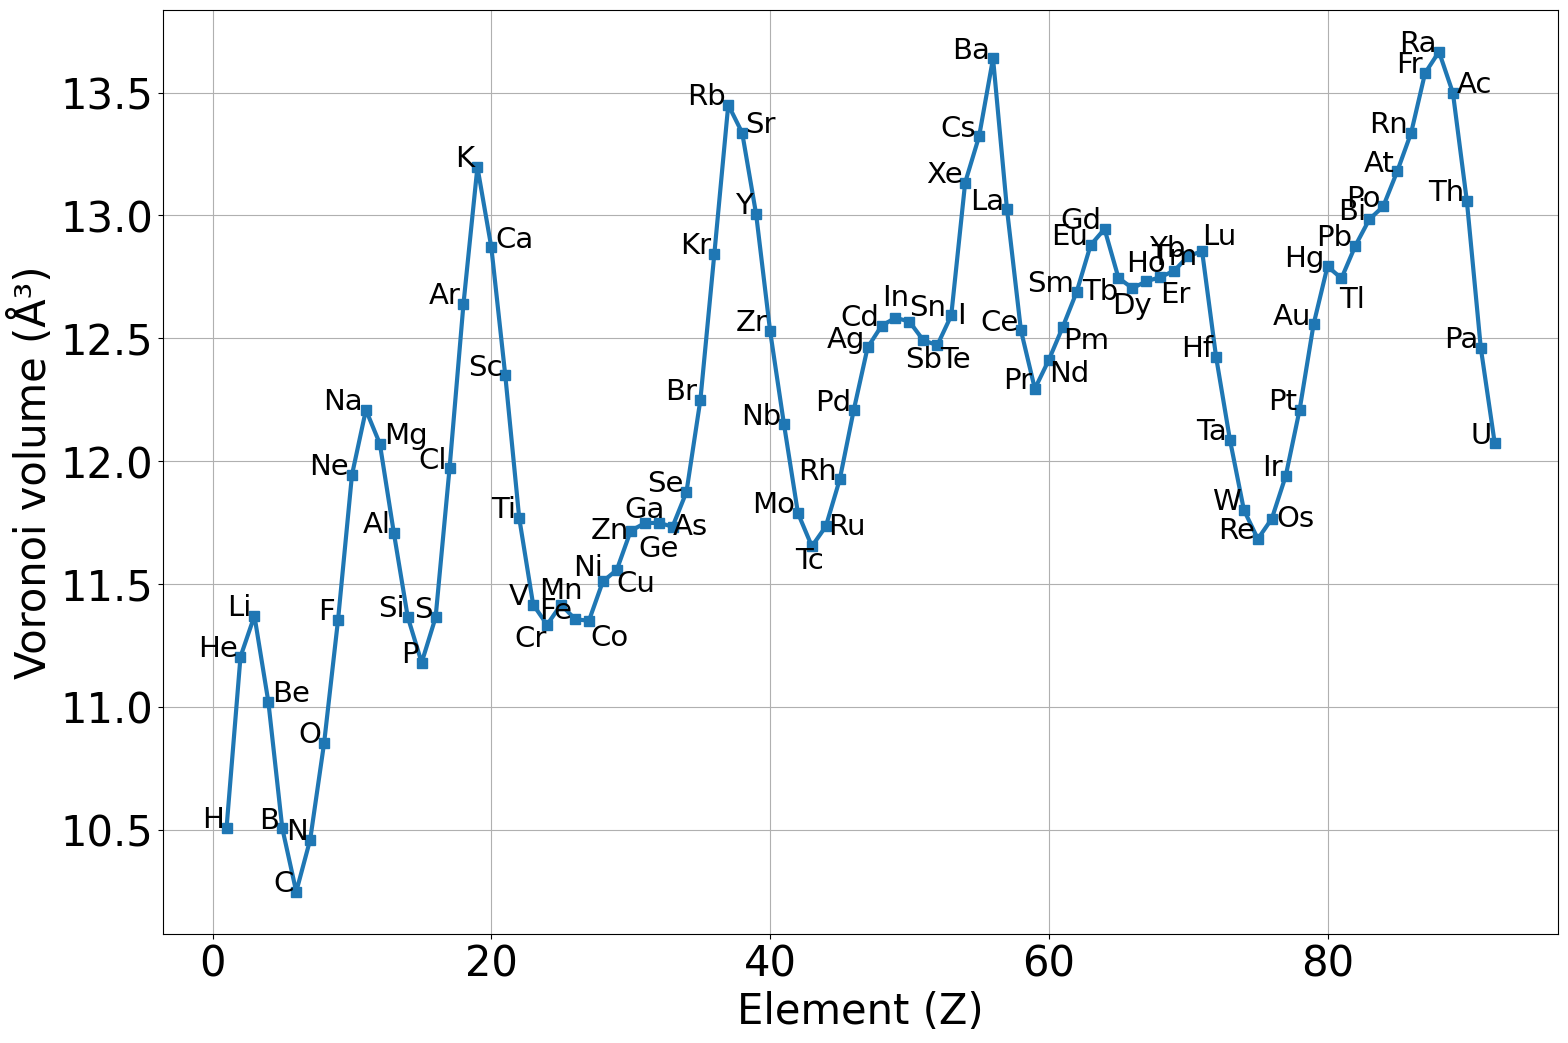

In [4]:
column = "vvol"
# Plotting column against 'Z'
plt.figure(figsize=(18, 12))
plt.plot(bulk_df['Z'], bulk_df[column], marker='s', linewidth = 3, markersize=7)

# Adding a horizontal line
# plt.axhline(y=11.356932331342922, color='r', linestyle='--', label='Fe BCC bulk')
# plt.text(92, 11.356932331342922-0.2, "Fe BCC = 11.35 Å³", fontsize=30, ha='right')

#Labeling points on the plot below each point
element_fontsize = 21
for idx, row in bulk_df.iterrows():
    if row.element == "Mg":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Be":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Ca":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "V":
        plt.text(row['Z']-0.3, row[column], row['element'], fontsize=element_fontsize, ha='right')
    elif row.element == "Cr":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top', ha="right")
    elif row.element == "Mn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="center")
    elif row.element == "Co":
        plt.text(row['Z']+0.1, row[column]-0.01, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Cu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ni":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="right")
    elif row.element == "Zn":
        plt.text(row['Z']-0.1, row[column], row['element'], fontsize=element_fontsize, va='center', ha="right")
    elif row.element == "Ga":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha='center')
    elif row.element == "Ge":
        plt.text(row['Z'], row[column]-0.05, row['element'], fontsize=element_fontsize, va='top', ha='center')
    elif row.element == "As":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Sr":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Tc":
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ru":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va='center')
    elif row.element == "In":
        plt.text(row['Z'], row[column]+0.05, row['element'], fontsize=element_fontsize, ha='center')
    elif row.element == "Sn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='bottom')
    elif row.element == "Sb":
        plt.text(row['Z'], row[column]-0.02, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Te":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "I":
        plt.text(row['Z']+0.4, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Nd":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Pm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Tb":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='right', va="top")
    elif row.element == "Dy":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ho":
        plt.text(row['Z'], row[column]+0.015, row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Er":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "Tm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Lu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="bottom")
    elif row.element == "Os":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Tl":
        plt.text(row['Z']-0.2, row[column]-0.03, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ac":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    else:
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='right')

# Adding labels, title, and grid
plt.xlabel("Element (Z)", fontsize=30)
plt.ylabel("Voronoi volume (Å³)", fontsize=30)
# plt.title(columnvs Atomic Number (Z)", fontsize=24)
plt.grid(True)
# Adjusting tick size
plt.tick_params(axis='x', labelsize=30)  # Adjust x-tick label size
plt.tick_params(axis='y', labelsize=30)  # Adjust x-tick label size

## Figure 3

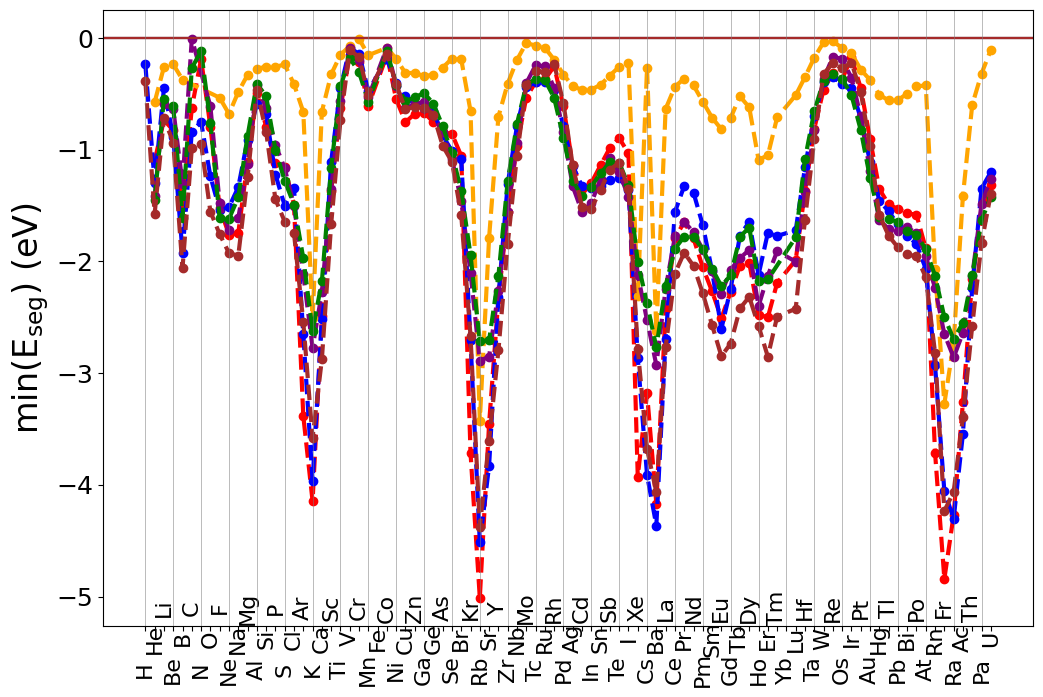

In [5]:
fig = plot_minEseg_prop(df,
                        y_prop="E_seg",
                      x_prop="Z",
                      ylabel=r"$\rm{min}(E_{\rm{seg}})$ (eV)",
                      figsize=(12, 8),
                      shift_xticks=True,
                      xlabel_fontsize=24,
                      xtick_yshift = -0.045,
                      ylabel_fontsize=24,
                      xtick_fontsize=16,
                      ytick_fontsize=18,
                      legend_fontsize=20)

## Figure 4 - maximum segregation binding vs Voronoi volume in bulk

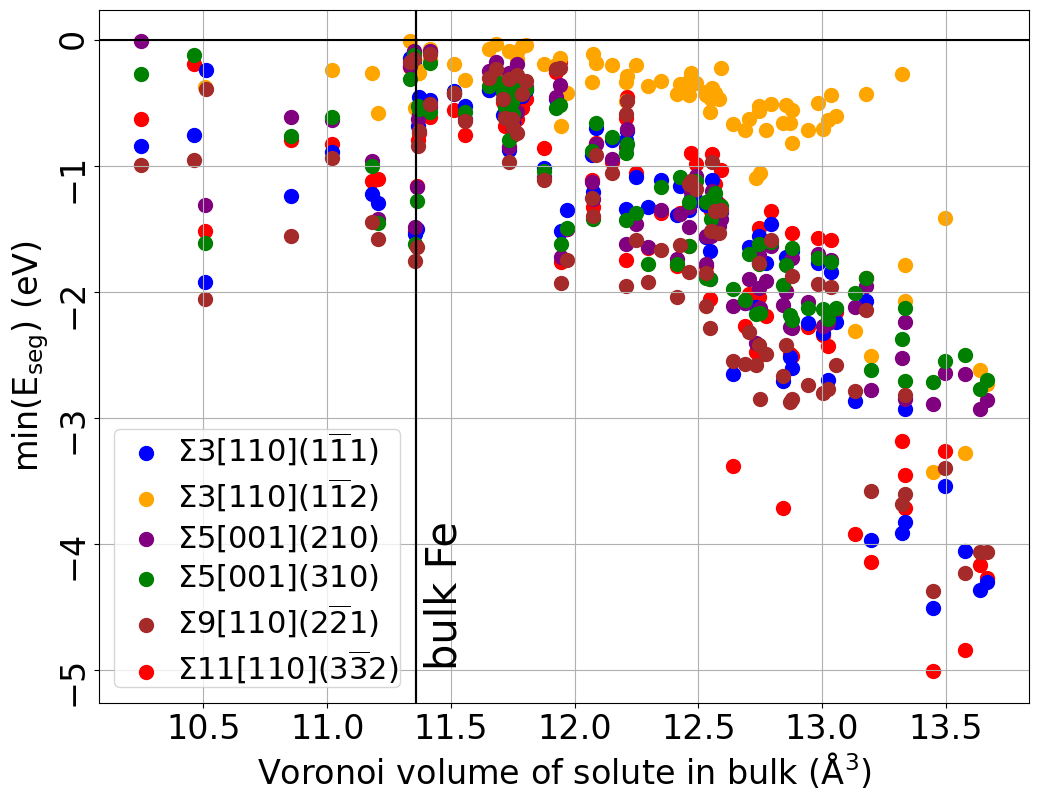

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 9))
gb_legends = []
# Looping over each unique "GB" group
for idx, (gb, group) in enumerate(df.dropna(subset=["E_seg"]).groupby("GB")):
    # For each "GB" group, group by "element" and find the minimum "Eseg"
    min_eseg_per_element = group.groupby("element").apply(lambda x: x.nsmallest(1, 'E_seg').iloc[0])
    min_eseg_per_element = min_eseg_per_element[min_eseg_per_element['E_seg'] <= 0]
    min_eseg_per_element = min_eseg_per_element.reset_index(drop=True).merge(bulk_df[["vvol", "element"]], on = "element")

    x_values = min_eseg_per_element['vvol']  # "VorVol" values for x-axis
    y_values = min_eseg_per_element['E_seg']  # Corresponding "E_seg" values, can change this to any column in df, i.e. R_

    # Plot for "E_seg" on the primary y-axis
    line1= ax1.scatter(x_values, y_values, color=custom_colors[gb], marker="o", s=100)

    gb_legends.append((line1, f'{gb_latex_dict[gb]}'))
    
gb_legends.append(gb_legends.pop(0))
# Set labels and axis
ax1.set_ylabel(r"min$(\rm{E}_{\rm{seg}})$ (eV)", fontsize=24)
ax1.set_xlabel(r"Voronoi volume of solute in bulk ($\rm{\AA}^3$)", fontsize=24)

ax1.tick_params(axis='y', labelsize=24, rotation=90)
ax1.tick_params(axis='x', labelsize=24)

# horizontal ref line at 0 E_seg
ax1.axhline(0, color="k")
# vertical Fe line at Fe VorVol
ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.text(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0]+0.2, -5, "bulk Fe", verticalalignment='bottom', horizontalalignment='right', rotation='vertical', fontsize=30)

ax1.axvline(bulk_df[bulk_df["element"] == "Fe"].vvol.values[0], color="k")
ax1.grid(which="major")

gb_legend = plt.legend(*zip(*gb_legends), loc='lower left', fontsize=22, handletextpad=0.01, borderpad=0.05, labelspacing=0.3)

## Figure 5

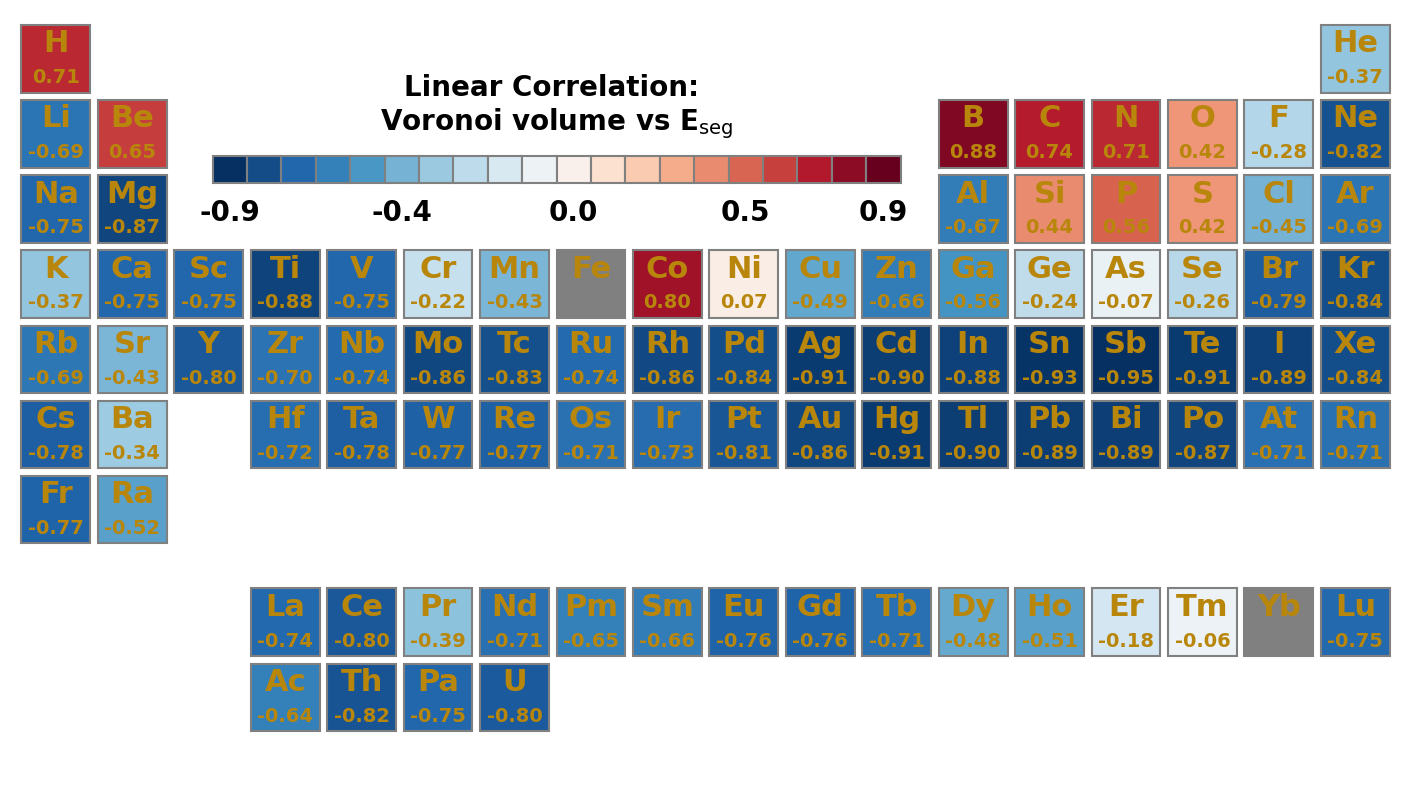

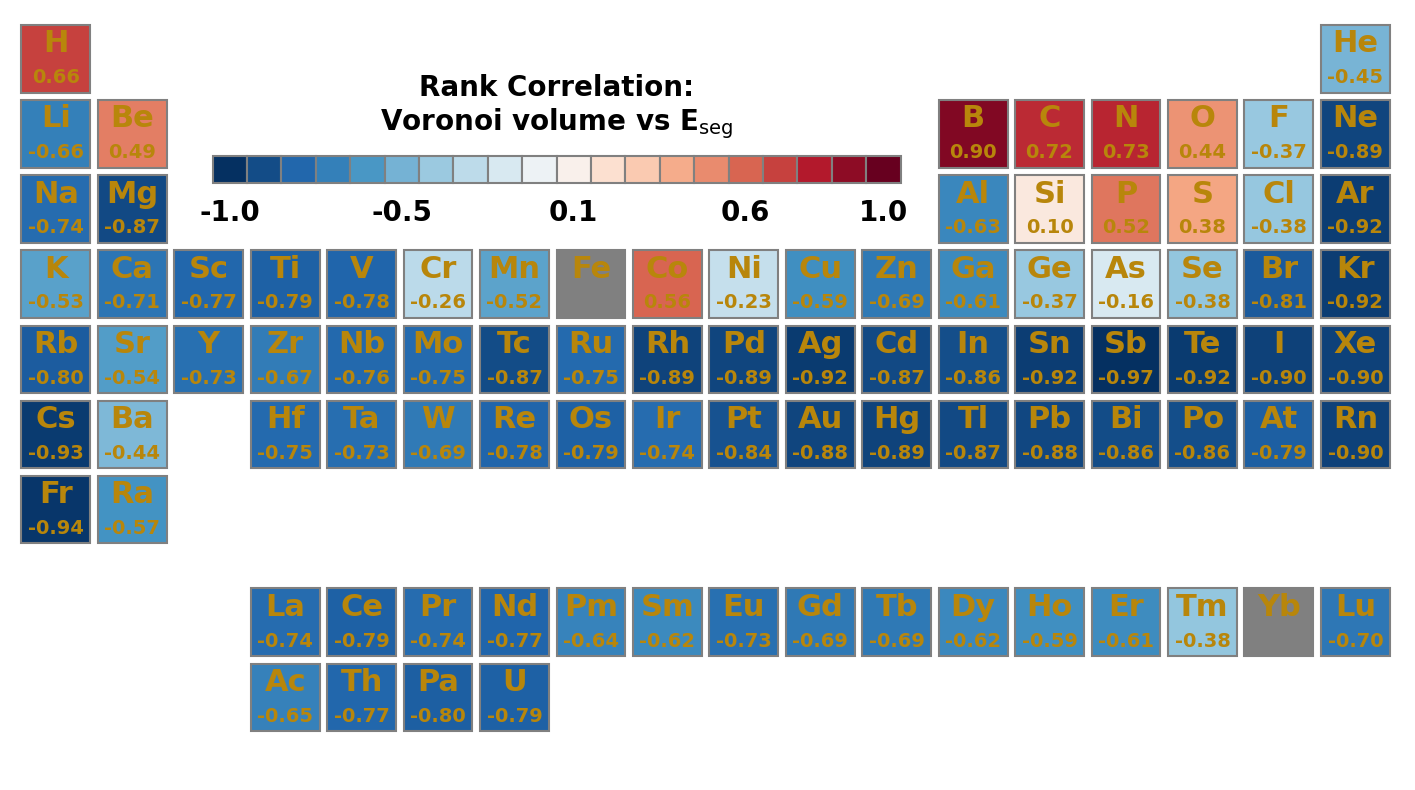

In [7]:
import matplotlib.cm as cm
from scipy.stats import pearsonr, spearmanr

VorVol_Eseg_corrlist = []
magmom_Eseg_corrlist = []
VorVol_magmom_corrlist = []
element_str_list = []

for element_str, element_df in df.groupby("element"):
    element_df = element_df[element_df["VorNN_tot_vol"] < 40]

    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.magmom_solute.values, element_df.E_seg.values)
        spearman_corr, _ = spearmanr(element_df.magmom_solute.values, element_df.E_seg.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    magmom_Eseg_corrlist.append((pearson_corr, spearman_corr))
    
    try:
        pearson_corr, _ = pearsonr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
        spearman_corr, _ = spearmanr(element_df.VorNN_tot_vol.values, element_df.magmom_solute.values)
    except ValueError:
        pearson_corr, spearman_corr = np.nan, np.nan
    VorVol_magmom_corrlist.append((pearson_corr, spearman_corr))
    
    element_str_list.append(element_str)

corr_r_vvol_eseg = dict(zip(element_str_list, VorVol_Eseg_corrlist))
corr_r_magmom_Eseg = dict(zip(element_str_list, magmom_Eseg_corrlist))
corr_vvol_magmom = dict(zip(element_str_list, VorVol_magmom_corrlist))

bulk_df["pearson_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][0] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_eseg"] = [corr_r_vvol_eseg[row.element][1] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][0] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_magmom_Eseg"] = [corr_r_magmom_Eseg[row.element][1] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]
bulk_df["pearson_r_vvol_magmom"] = [corr_vvol_magmom[row.element][0] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]
bulk_df["spearman_r_vvol_magmom"] = [corr_vvol_magmom[row.element][1] if row.element != "Fe" else np.nan for i, row in bulk_df.iterrows()]

fig, ax = periodic_table_plot(bulk_df,
                    "pearson_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Linear Correlation: " + "\n"+r"Voronoi volume vs E$_{\rm seg}$"
                    )

fig, ax = periodic_table_plot(bulk_df,
                    "spearman_r_vvol_eseg",
                    center_cm_zero=True,
                    cmap = cm.RdBu_r,
                    property_name=r"Rank Correlation:" + "\n"+r"Voronoi volume vs E$_{\rm seg}$")

## Figure 6

In [8]:
# Here I'm building a df with entries like GB - element - list of segregation energies at GB over all sites
df_spectra = []

for gb, gb_df in df.groupby("GB"):
    for element, element_df in gb_df.groupby("element"):
        element_df = element_df.dropna(subset=["structure"])
        element_df = element_df.reset_index(drop=True)
        unique_site_spectra = element_df.E_seg.values
        element_spectra = []
        print(element)
        for _, site_row in element_df.iterrows():
            element_spectra += [site_row.E_seg] * int(site_row.site_multiplicity)

        df_spectra.append([gb, element, element_df.Z.values[0], element_df.site.values, element_df.site_multiplicity.values, element_spectra, unique_site_spectra])

df_spectra = pd.DataFrame(df_spectra, columns=['GB', 'element', 'Z', "sites", "site_multiplicity", 'total_spectra', 'site_spectra'])
df_spectra.sort_values(by="Z")

Ac
Ag
Al
Ar
As
At
Au
B
Ba
Be
Bi
Br
C
Ca
Cd
Ce
Cl
Co
Cr
Cs
Cu
Dy
Er
Eu
F
Fr
Ga
Gd
Ge
H
He
Hf
Hg
Ho
I
In
Ir
K
Kr
La
Li
Lu
Mg
Mn
Mo
N
Na
Nb
Nd
Ne
Ni
O
Os
P
Pa
Pb
Pd
Pm
Po
Pr
Pt
Ra
Rb
Re
Rh
Rn
Ru
S
Sb
Sc
Se
Si
Sm
Sn
Sr
Ta
Tb
Tc
Te
Th
Ti
Tl
Tm
U
V
W
Xe
Y
Zn
Zr
Ac
Ag
Al
Ar
As
At
Au
B
Ba
Be
Bi
Br
C
Ca
Cd
Ce
Cl
Co
Cr
Cs
Cu
Dy
Er
Eu
F
Fr
Ga
Gd
Ge
H
He
Hf
Hg
Ho
I
In
Ir
K
Kr
La
Li
Lu
Mg
Mn
Mo
N
Na
Nb
Nd
Ne
Ni
O
Os
P
Pa
Pb
Pd
Pm
Po
Pr
Pt
Ra
Rb
Re
Rh
Rn
Ru
S
Sb
Sc
Se
Si
Sm
Sn
Sr
Ta
Tb
Tc
Te
Th
Ti
Tl
Tm
U
V
W
Xe
Y
Zn
Zr
Ac
Ag
Al
Ar
As
At
Au
B
Ba
Be
Bi
Br
C
Ca
Cd
Ce
Cl
Co
Cr
Cs
Cu
Dy
Er
Eu
F
Fr
Ga
Gd
Ge
H
He
Hf
Hg
Ho
I
In
Ir
K
Kr
La
Li
Lu
Mg
Mn
Mo
N
Na
Nb
Nd
Ne
Ni
O
Os
P
Pa
Pb
Pd
Pm
Po
Pr
Pt
Ra
Rb
Re
Rh
Rn
Ru
S
Sb
Sc
Se
Si
Sm
Sn
Sr
Ta
Tb
Tc
Te
Th
Ti
Tl
Tm
U
V
W
Xe
Y
Zn
Zr
Ac
Ag
Al
Ar
As
At
Au
B
Ba
Be
Bi
Br
C
Ca
Cd
Ce
Cl
Co
Cr
Cs
Cu
Dy
Er
Eu
F
Fr
Ga
Gd
Ge
H
He
Hf
Hg
Ho
I
In
Ir
K
Kr
La
Li
Lu
Mg
Mn
Mo
N
Na
Nb
Nd
Ne
Ni
O
Os
P
Pa
Pb
Pd
Pm
Po
Pr
Pt
Ra
Rb
Re
Rh
Rn
Ru
S
Sb
Sc
Se
Si
Sm
Sn
Sr
Ta
Tb
Tc
Te
Th
Ti

,GB,element,Z,sites,site_multiplicity,total_spectra,site_spectra
480,S9_RA110_S2_21,H,1,"[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 3...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]","[1.5416398467968975, 1.5416398467968975, 1.507...","[1.5416398467968975, 1.5071354567968456, 1.466..."
29,S11_RA110_S3_32,H,1,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]","[1.4822451067968245, 1.4822451067968245, 0.284...","[1.4822451067968245, 0.2842066567968118, 1.579..."
209,S3_RA110_S1_12,H,1,"[12, 14, 16, 18, 20, 22, 24]","[4, 4, 4, 4, 4, 4, 2]","[1.5079424367967817, 1.5079424367967817, 1.507...","[1.5079424367967817, 1.4869163767967848, 1.506..."
389,S5_RA001_S310,H,1,"[23, 27, 33, 37, 40]","[8, 8, 8, 8, 4]","[1.5147374567968654, 1.5147374567968654, 1.514...","[1.5147374567968654, 1.160192566796809, 1.2144..."
299,S5_RA001_S210,H,1,"[24, 27, 29, 31, 33, 35, 37]","[4, 4, 4, 4, 4, 2, 2]","[1.364049726796793, 1.364049726796793, 1.36404...","[1.364049726796793, 1.1825839867967716, 1.3847..."
...,...,...,...,...,...,...,...
443,S5_RA001_S310,U,92,"[23, 27, 33, 37, 40]","[8, 8, 8, 8, 4]","[-0.10740596000005098, -0.10740596000005098, -...","[-0.10740596000005098, -0.2333489700000655, -0..."
83,S11_RA110_S3_32,U,92,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22]","[2, 2, 2, 2, 2, 2, 2, 2, 1, 1]","[0.4026032799998802, 0.4026032799998802, 0.370...","[0.4026032799998802, 0.37028147999990324, -1.3..."
353,S5_RA001_S210,U,92,"[24, 27, 29, 31, 33, 35, 37]","[4, 4, 4, 4, 4, 2, 2]","[-0.0646357400000852, -0.0646357400000852, -0....","[-0.0646357400000852, -0.21687178000013319, -0..."
263,S3_RA110_S1_12,U,92,"[14, 16, 18, 20, 22, 24]","[4, 4, 4, 4, 4, 2]","[0.27995823999987124, 0.27995823999987124, 0.2...","[0.27995823999987124, 0.25853290999987166, 0.2..."


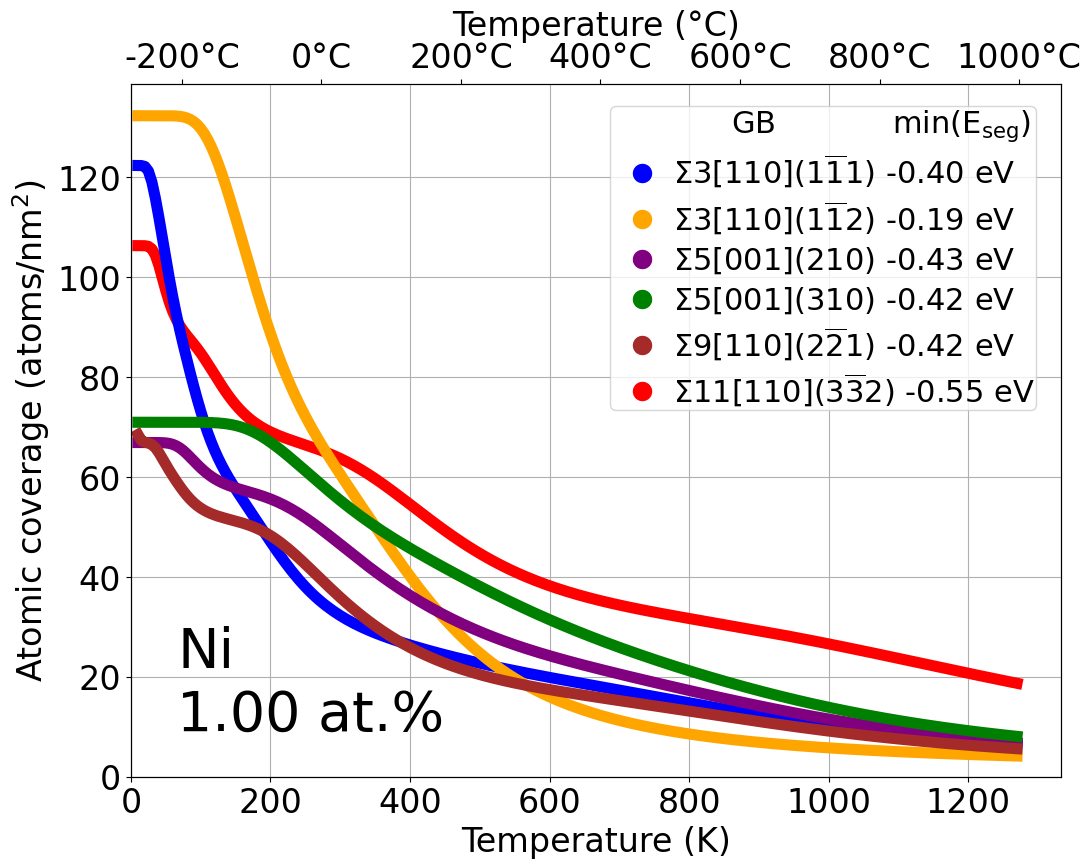

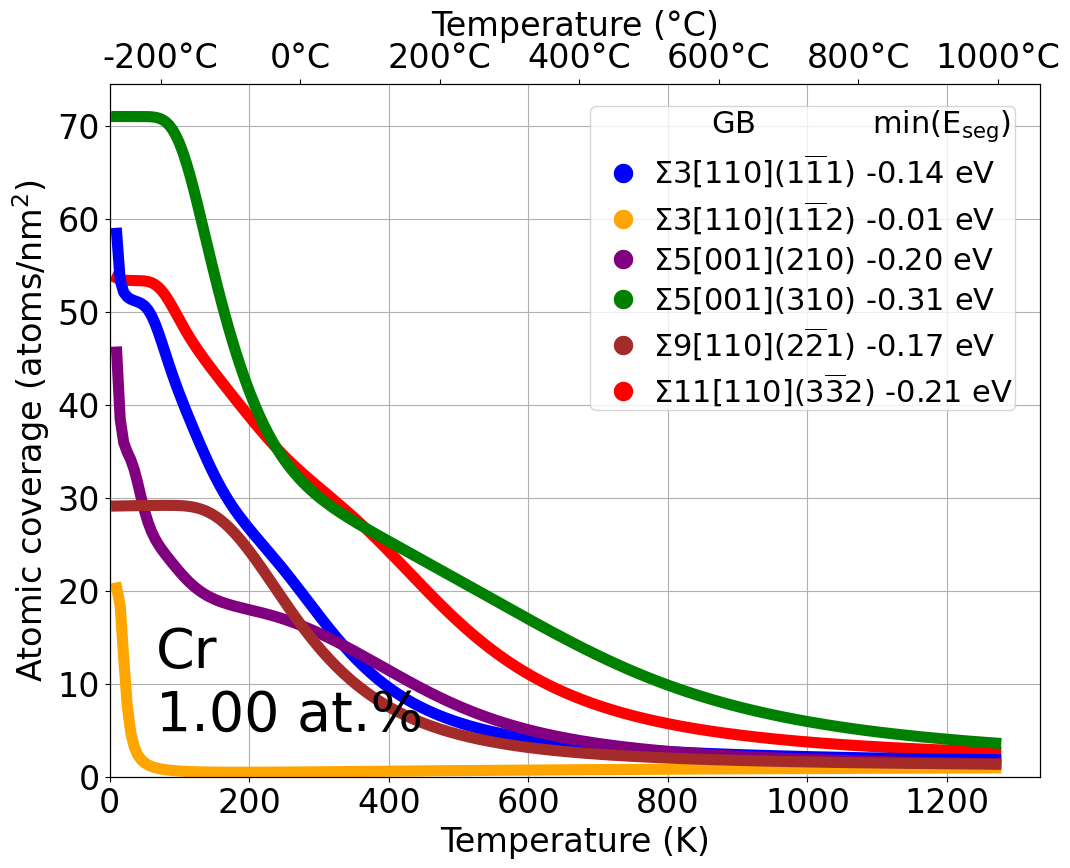

In [12]:
from FeGB_PtableSeg.plotters import plot_coverage_vs_temperature
#alloy_conc = [0.1, 0.5, 1, 2, 3, 4, 5, 10]
alloy_conc = [1]

temperature_range = np.arange(10, 1273, 5)
elements = ["Ni", "Cr"]
for conc in alloy_conc:
    if conc == 1:
        close_fig=False
    else:
        close_fig=True
    for element in elements:
        plot_coverage_vs_temperature(df, df_spectra, conc, temperature_range, element, close_fig=close_fig)


## Figure 7a

## Figure 7b

## Figure 8

## Figure 9

## Figure 10

## Figure 11

## Figure 12

# Supplementary Information plots

# Bonus plots

## Summed bond order in the bulk 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


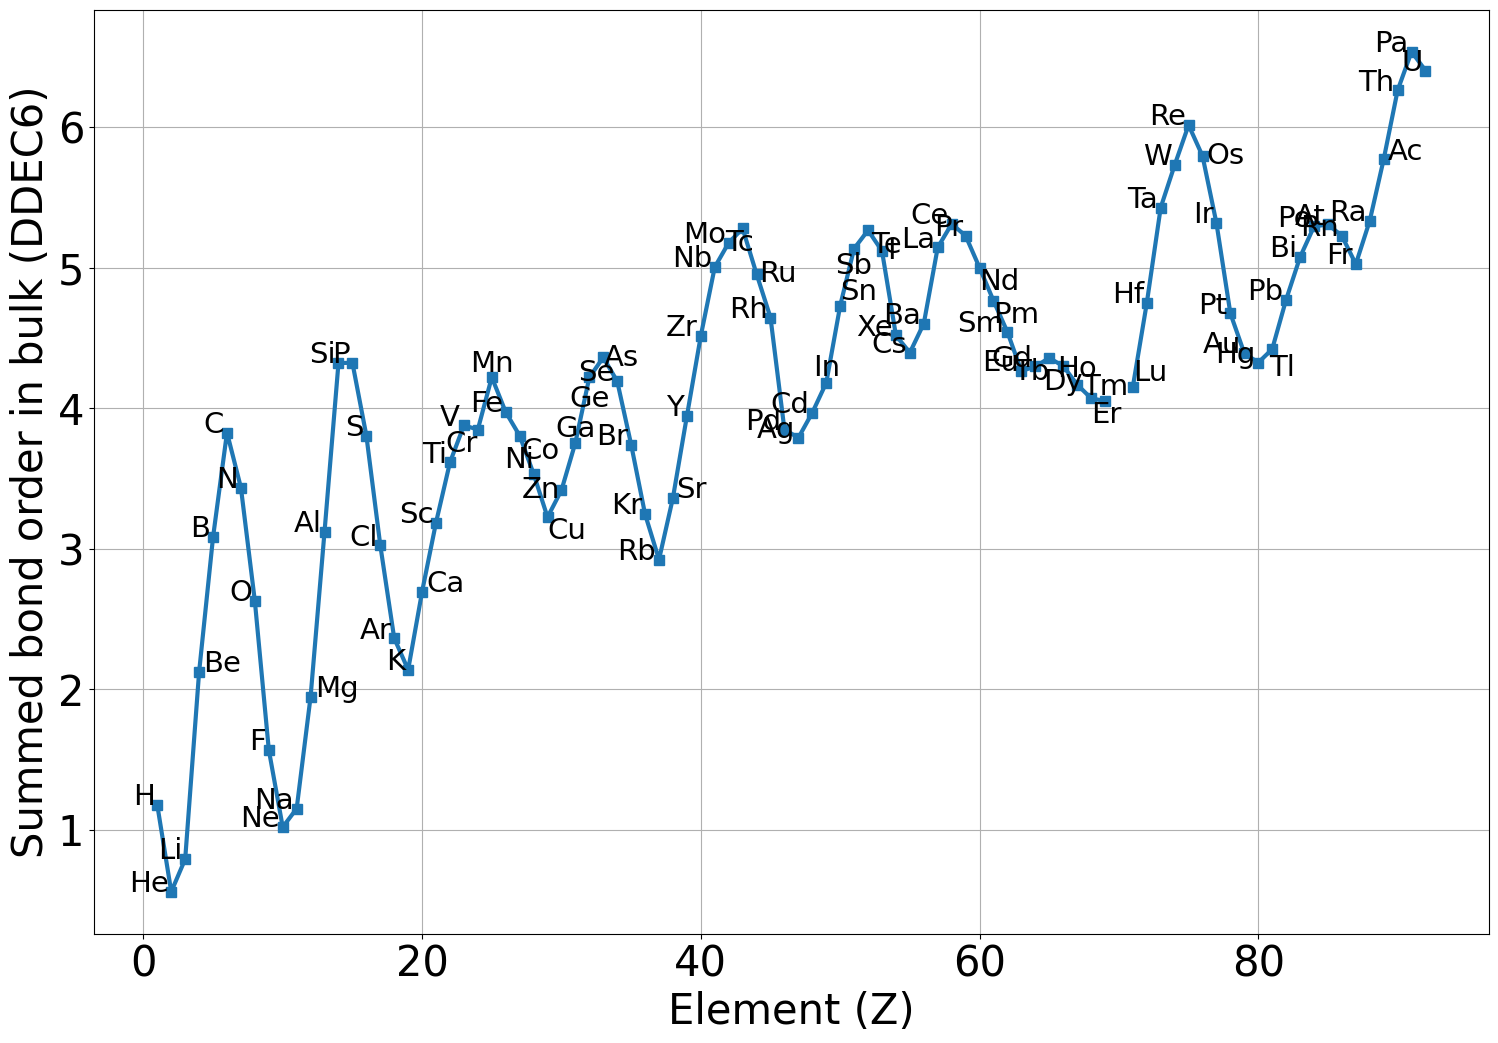

In [11]:
column = "summed_DDEC6_bond_order"
# Plotting column against 'Z'
plt.figure(figsize=(18, 12))
plt.plot(bulk_df['Z'], bulk_df[column], marker='s', linewidth = 3, markersize=7)

# Adding a horizontal line
# plt.axhline(y=11.356932331342922, color='r', linestyle='--', label='Fe BCC bulk')
# plt.text(92, 11.356932331342922-0.2, "Fe BCC = 11.35 Å³", fontsize=30, ha='right')

#Labeling points on the plot below each point
element_fontsize = 21
for idx, row in bulk_df.iterrows():
    if row.element == "Mg":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Be":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Ca":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "V":
        plt.text(row['Z']-0.3, row[column], row['element'], fontsize=element_fontsize, ha='right')
    elif row.element == "Cr":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top', ha="right")
    elif row.element == "Mn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="center")
    elif row.element == "Co":
        plt.text(row['Z']+0.1, row[column]-0.01, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Cu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ni":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha="right")
    elif row.element == "Zn":
        plt.text(row['Z']-0.1, row[column], row['element'], fontsize=element_fontsize, va='center', ha="right")
    elif row.element == "Ga":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, va='bottom', ha='center')
    elif row.element == "Ge":
        plt.text(row['Z'], row[column]-0.05, row['element'], fontsize=element_fontsize, va='top', ha='center')
    elif row.element == "As":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Sr":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left')
    elif row.element == "Tc":
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ru":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va='center')
    elif row.element == "In":
        plt.text(row['Z'], row[column]+0.05, row['element'], fontsize=element_fontsize, ha='center')
    elif row.element == "Sn":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='bottom')
    elif row.element == "Sb":
        plt.text(row['Z'], row[column]-0.02, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Te":
        plt.text(row['Z']+0.2, row[column], row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "I":
        plt.text(row['Z']+0.4, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Nd":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Pm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va='top')
    elif row.element == "Tb":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='right', va="top")
    elif row.element == "Dy":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='center', va="top")
    elif row.element == "Ho":
        plt.text(row['Z'], row[column]+0.015, row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Er":
        plt.text(row['Z'], row[column]-0.015, row['element'], fontsize=element_fontsize, ha='left', va="top")
    elif row.element == "Tm":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='center', va="bottom")
    elif row.element == "Lu":
        plt.text(row['Z'], row[column], row['element'], fontsize=element_fontsize, ha='left', va="bottom")
    elif row.element == "Os":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left', va="center")
    elif row.element == "Tl":
        plt.text(row['Z']-0.2, row[column]-0.03, row['element'], fontsize=element_fontsize, va='top')
    elif row.element == "Ac":
        plt.text(row['Z']+0.3, row[column], row['element'], fontsize=element_fontsize, ha='left')
    else:
        plt.text(row['Z']-0.2, row[column], row['element'], fontsize=element_fontsize, ha='right')

# Adding labels, title, and grid
plt.xlabel("Element (Z)", fontsize=30)
plt.ylabel("Summed bond order in bulk (DDEC6)", fontsize=30)
# plt.title(columnvs Atomic Number (Z)", fontsize=24)
plt.grid(True)
# Adjusting tick size
plt.tick_params(axis='x', labelsize=30)  # Adjust x-tick label size
plt.tick_params(axis='y', labelsize=30)  # Adjust x-tick label size